# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll **train classifiers to distinguish between the topics based on the text of the posts**. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the **feature representation quite sparse** -- only a few words of the total vocabulary are active in any given document. **The bag-of-words assumption here is that the label depends only on the words; their order is not important.**

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please **don't add any more**. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [116]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


---
**(1)** For each of the first 5 training examples, print the text of the message along with the label.

In [78]:
def P1(num_examples=5):
    # Loop though num_examples and print label and 
    for i in range(num_examples):
        print '-'*100
        print '\nEXAMPLE %d\nLABEL:  \t%s' % (i+1, categories[train_labels[i]])
        print 'MESSAGE:\n\n%s' % train_data[i]
        print '\n'

### STUDENT END ###
P1()

----------------------------------------------------------------------------------------------------

EXAMPLE 1
LABEL:  	talk.religion.misc
MESSAGE:

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


----------------------------------------------------------------------------------------------------

EXAMPLE 2
LABEL:  	sci.space
MESSAGE:



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic w

---
**(2)** Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
    
    # Initialize vectorizer
    vectorizer = CountVectorizer(min_df=1)

    # Fit model
    feature_vectors = vectorizer.fit_transform(train_data)
    
    # Save total size of matrix
    fv_size = feature_vectors.shape[0] * feature_vectors.shape[1]
    
    print '\nANSWERS\n'
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part a)
    print 'a)'
    print 'The size of the vocabulary is %0d.' % feature_vectors.shape[1]
    print 'On average, each example has %0.2f non-zero features.' % np.mean(feature_vectors.getnnz(axis=1))
    print 'Non-zero values represent %0.2f%% of all the matrix.' % (100*float(feature_vectors.nnz) / fv_size)
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part b)
    print 'b)'
    
    names = vectorizer.get_feature_names() 
    print 'The 0th feature string is:\t %s' % names[0]
    print 'The last feature string is:\t %s' % names[len(names)-1]
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part c)
    print 'c)'
    
    my_vocabulary = ["atheism", "graphics", "space", "religion"]
    # Set new vocabulary of Vectorizer
    vectorizer.set_params(vocabulary=my_vocabulary)
    feature_vectors = vectorizer.fit_transform(train_data)
    
    print 'The feature names are %s.' % vectorizer.get_feature_names()
    print 'The size %s of the feature vector corresponds to the 4 word vocabulary.' % (feature_vectors.shape,)
    print '\nOn average, each example has %0.2f non-zero features' % np.mean(feature_vectors.getnnz(axis=1))
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part d)
    print 'd)'
    
    # Reset vocabulary
    vectorizer.set_params(vocabulary=None, analyzer='char_wb')
    
    print 'Character Bigram Vocabulary '
    # Set bigram, fit model, and save vocabulary names
    vectorizer.set_params(ngram_range=(1, 2), analyzer='char')
    feature_vectors = vectorizer.fit_transform(train_data)
    names = vectorizer.get_feature_names()
    # Print size of vocabulary and a sample
    print '   Unbounded Size:     %0d' % feature_vectors.shape[1], '\t sample ', [names[i].encode('utf-8') for i in range(0,3000,300)]
    
    # Set bigram, fit model, and save vocabulary names
    vectorizer.set_params(ngram_range=(1, 2), analyzer='char_wb')
    feature_vectors = vectorizer.fit_transform(train_data)
    names = vectorizer.get_feature_names()
    # Print size of vocabulary and a sample
    print '   Word Bounded Size:  %0d' % feature_vectors.shape[1], '\t sample ', [names[i].encode('utf-8') for i in range(0,3000,300)]
    

    print '\nCharacter Trigram Vocabulary'
    # Set analyzer to trigram, fit model, and save vocabulary names
    vectorizer.set_params(ngram_range=(1, 3), analyzer='char')
    feature_vectors = vectorizer.fit_transform(train_data)
    names = vectorizer.get_feature_names() 
    # Print size of vocabulary and a sample
    print '   Unbounded Size:     %0d' % feature_vectors.shape[1], '\t sample ', [names[i].encode('utf-8') for i in range(0,35000,3500)]
    
    # Set analyzer to trigram, fit model, and save vocabulary names
    vectorizer.set_params(ngram_range=(1, 3), analyzer='char_wb')
    feature_vectors = vectorizer.fit_transform(train_data)
    names = vectorizer.get_feature_names()
    # Print size of vocabulary and a sample
    print '   Word Bounded Size:  %0d' % feature_vectors.shape[1], '\t sample ', [names[i].encode('utf-8') for i in range(0,29000,2900)]
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part e)
    print 'e)'
    
    # Re-initiate vectorizer
    vectorizer = CountVectorizer(min_df=10)
    feature_vectors = vectorizer.fit_transform(train_data)
    
    print 'The size of the vocabulary when pruned is %0d.' % feature_vectors.shape[1]
    print '-'*100
    
    #----------------------------------------------------------------------------------------------------------------
    # Answers to part f)
    print 'f)'
    
    # Re-initiate vectorizer
    vectorizer.set_params(min_df=1)
    feature_vectors = vectorizer.fit_transform(train_data)
    train_names = vectorizer.get_feature_names()
    
    feature_vectors = vectorizer.fit_transform(dev_data)
    dev_names = vectorizer.get_feature_names()
    
    diff_size = len(set(dev_names) - set(train_names))
    print 'There are %d words in dev data missing in the vocabulary, equivalent to %0.1f%% of the words in dev data.' % (diff_size, 100*diff_size/ float(len(dev_names)))
    
    ### STUDENT END ###
P2()


ANSWERS

----------------------------------------------------------------------------------------------------
a)
The size of the vocabulary is 26879.
On average, each example has 96.71 non-zero features.
Non-zero values represent 0.36% of all the matrix.
----------------------------------------------------------------------------------------------------
b)
The 0th feature string is:	 00
The last feature string is:	 zyxel
----------------------------------------------------------------------------------------------------
c)
The feature names are ['atheism', 'graphics', 'space', 'religion'].
The size (2034, 4) of the feature vector corresponds to the 4 word vocabulary.

On average, each example has 0.27 non-zero features
----------------------------------------------------------------------------------------------------
d)
Character Bigram Vocabulary 
   Unbounded Size:     3370 	 sample  ['\x08', '#g', '+\n', '06', '6(', '=q', 'a-', 'f2', 'kp', 'pp']
   Word Bounded Size:  3167 	 sampl

---
**(3)** Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [81]:
# Create features for train and dev data 
vectorizer = CountVectorizer()
train_ftvec = vectorizer.fit_transform(train_data)
dev_ftvec = vectorizer.transform(dev_data)

def P3():
    
    # --- KNN Classifier ---------------------------------------------------------------------------------
    # Parameters to explore
    params = {'n_neighbors': range(10,105,5)}
    
    # Initialize Grid Search with KNN
    clf = GridSearchCV(KNeighborsClassifier(), params, scoring='f1')
    clf.fit(train_ftvec, train_labels) # running the grid search
    
    # Report KNeighbors best parameter and f1 score on dev data
    print "K-Nearest Neighbors"
    print "    Best Parameter:\t\t", clf.best_params_, "\n    Best f1 Score:\t\t%0.3f" % clf.best_score_
    print ">>> f1 Score on Dev Data:\t%0.3f" % metrics.f1_score(dev_labels, clf.predict(dev_ftvec), average='macro')
    
    # --- Multi NB Classifier ----------------------------------------------------------------------------
    # Parameters to explore
    params = {'alpha': (0, 0.0001, 0.001, 0.01, 0.1)}
    
    # Initialize Grid Search with Multi NB
    clf = GridSearchCV(MultinomialNB(), params, scoring='f1')
    clf.fit(train_ftvec, train_labels) # running the grid search
    
    # Report Multinomial NB best parameter and f1 score on dev data
    print "\nMultinomial NB"
    print "    Best Parameter:\t\t", clf.best_params_, "\n    Best f1 Score:\t\t%0.3f" % clf.best_score_
    print ">>> f1 Score on Dev Data:\t%0.3f" % metrics.f1_score(dev_labels, clf.predict(dev_ftvec), average='macro')
    
    # --- Logistic Regression Classifier------------------------------------------------------------------
    # Parameters to explore
    params = {'C': ( 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 1, 2)}
    
    # Initialize Grid Search withLogistic Regression
    clf = GridSearchCV(LogisticRegression(penalty='l2'), params, scoring='f1')
    clf.fit(train_ftvec, train_labels) # running the grid search
    
    # Report Multinomial NB best parameter and f1 score on dev data
    print "\nLogistic Regression"
    print "    Best Parameter:\t\t", clf.best_params_, "\n    Best f1 Score:\t\t%0.3f" % clf.best_score_
    print ">>> f1 Score on Dev Data:\t%0.3f" % metrics.f1_score(dev_labels, clf.predict(dev_ftvec), average='macro')

### STUDENT END ###
P3()

K-Nearest Neighbors
    Best Parameter:		{'n_neighbors': 95} 
    Best f1 Score:		0.429
>>> f1 Score on Dev Data:	0.438

Multinomial NB
    Best Parameter:		{'alpha': 0.01} 
    Best f1 Score:		0.829
>>> f1 Score on Dev Data:	0.755

Logistic Regression
    Best Parameter:		{'C': 0.2} 
    Best f1 Score:		0.772
>>> f1 Score on Dev Data:	0.688


**ANSWERS**

**a. Why doesn't nearest neighbors work well for this problem?**

> Nearest neighbors doesn't work well because the feature set is sparse and highly multidimensional. The small training set in this example is not a good sample of the large feature space, so nearness becomes a poor comparison for classification.

**b. Any ideas why logistic regression doesn't work as well as Naive Bayes?**

> Logistic regresion doesn't work as well because the number of training examples is small in comparison with the number of features (2034 training examples vs 26879 features). This is related to the probabilities estimated by each model; logistic regression estimates the conditional probabilites P(y|x) directly while naive bayes estimates the joint probability P(y,x). The few training examples and high number of features make it relatively easier to estimate the latter than the former.

**c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.**

In [144]:
for i in ( 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 1, 2):

    # Initialize Grid Search with Multi NB
    clf = LogisticRegression(penalty='l2', C=i)
    clf.fit(train_ftvec, train_labels) 
    
    # Report Multinomial NB best parameter and f1 score on dev data
    sqr_sum =  np.sum(clf.coef_*clf.coef_, axis=1)
    print "For C = %0.2f, the square weights are [%s]" % (i, '  '.join("%0.2f" % elem for elem in sqr_sum))


For C = 0.05, the square weights are [14.07  13.67  14.60  11.86]
For C = 0.10, the square weights are [27.13  24.66  27.46  23.02]
For C = 0.15, the square weights are [38.91  34.18  38.91  33.23]
For C = 0.20, the square weights are [49.72  42.75  49.33  42.67]
For C = 0.25, the square weights are [59.82  50.58  58.94  51.45]
For C = 0.30, the square weights are [69.29  57.88  67.90  59.78]
For C = 1.00, the square weights are [167.01  130.88  157.97  145.74]
For C = 2.00, the square weights are [257.51  197.86  239.87  226.58]


> C is the inverse of the regularization strength. Smaller values of C indicate high penalties and larger values of C indicate lower penalties. 

> Regularization penalizes coefficients with large values. Smaller C's will impose large penalties on large coefficients, so we expect coefficients to be small, and hence, their sums of squares will be small. In contrast, larger C's will impose smaller penalties on larger coefficients, so we expect higher coefficients to be accepted, and hence, to see larger sums of squares.  
  
> This is consistent with the resulting sum of square weights shown above.

---
**(4)** Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [50]:
def P4():
    
    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(train_ftvec, train_labels) 
    
    # get top-5 features for all categories
    ind = np.argsort(np.absolute(lr.coef_),axis=1)[:,-5:]

    # Loop to print table
    print "\nUNIGRAM FEATURES"
    for i in range(4):
        print "\n  %s top 5 largest weights" % categories[i]
        print "\t\t\t%s\t%s\t%s\t\t%s" % tuple(categories)
        for j in range(4,-1,-1):
            ftname = vectorizer.get_feature_names()[ind[i,j]]
            coef1, coef2, coef3, coef4 = lr.coef_[:,ind[i,j]]
            print "  %-12s\t\t   % 0.3f\t\t    % 0.3f\t      % 0.3f\t\t   % 0.3f" % (ftname, coef1, coef2, coef3, coef4)

    # Create features for train and dev data 
    bigram_vt = CountVectorizer(ngram_range=(2, 2))
    train_ftvec_bigram = bigram_vt.fit_transform(train_data)
    
    lrb = LogisticRegression()
    lrb.fit(train_ftvec_bigram, train_labels) 
    
    # get top-5 features for all categories
    ind = np.argsort(np.absolute(lrb.coef_),axis=1)[:,-5:]
    
    # Loop to print table
    print "\nBIGRAM FEATURES"
    for i in range(4):
        print "\n  %s top 5 largest weights" % categories[i]
        print "\t\t\t%s\t%s\t%s\t\t%s" % tuple(categories)
        for j in range(4,-1,-1):
            ftname = bigram_vt.get_feature_names()[ind[i,j]]
            coef1, coef2, coef3, coef4 = lrb.coef_[:,ind[i,j]]
            print "  %-14s\t\t% 0.3f\t\t    % 0.3f\t      % 0.3f\t\t   % 0.3f" % (ftname, coef1, coef2, coef3, coef4)

### STUDENT END ###
P4()


UNIGRAM FEATURES

  alt.atheism top 5 largest weights
			alt.atheism	talk.religion.misc	comp.graphics		sci.space
  space       		   -1.260		    -1.316	       2.162		   -1.171
  deletion    		    1.125		    -0.398	      -0.420		   -0.396
  atheists    		    1.028		    -0.098	      -0.321		   -0.835
  bobby       		    0.990		    -0.221	      -0.341		   -0.464
  religion    		    0.954		    -0.617	      -0.792		   -0.064

  talk.religion.misc top 5 largest weights
			alt.atheism	talk.religion.misc	comp.graphics		sci.space
  graphics    		   -0.759		     1.936	      -1.336		   -0.763
  image       		   -0.582		     1.347	      -0.826		   -0.470
  space       		   -1.260		    -1.316	       2.162		   -1.171
  file        		   -0.335		     1.266	      -0.807		   -0.626
  3d          		   -0.359		     1.125	      -0.702		   -0.378

  comp.graphics top 5 largest weights
			alt.atheism	talk.religion.misc	comp.graphics		sci.space
  space       		   -1.260		    -1.316	       2.162		   -1.171
  g

**ANSWER:**

**Any surprising features in the table?**

> For the unigram list, these are some surprising results: 

> - *alt.atheism* is positively related with 'bobby'
- *talk.religion.misc* is positively related with 'graphics', 'image', and '3d'
- *com.graphics* is negatively related with 'graphics' and positively related with 'space' and 'nasa'
- *sci.space* is negatively related with 'space' and positively related with 'christians' and 'christian'

> For the bigram list, these are some surprising results: 

> - 'cheers kent' is positively related with *alt.atheism* and negatively related with *talk.religion.misc*
- *talk.religion.misc* is positively related with 'comp graphics'
- *com.graphics* is positively relation with 'the moon'
- *sci.space* is positively relation with 'the fbi'

---
**(5)** Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [13]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    
    # Lower Case
    s = s.lower()
    
    # Remove stop-words (stop words from: Long List in http://www.ranks.nl/stopwords)
    my_stopwords = np.array(("a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent",
    "arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","can't","cause","causes","certain","certainly",
    "co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","didn't","different","do","does","doesn't","doing","done","don't","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","et-al","etc","even","ever","every","everybody","everyone","everything","everywhere","ex",
    "except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","hasn't","have","haven't","having","he","hed","hence","her","here","hereafter",
    "hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","i'll","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","isn't","it","itd","it'll","its","itself","i've","j","just","k","keep","keeps",
    "kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most",
    "mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok",
    "okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put",
    "q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall",
    "she","shed","she'll","shes","should","shouldn't","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","t","take","taken","taking",
    "tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","these","they","theyd","they'll","theyre","they've","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til",
    "tip","to","together","too","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","very","via","viz","vol","vols","vs","w","want","wants","was",
    "wasnt","way","we","wed","welcome","we'll","went","were","werent","we've","what","whatever","what'll","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","who'll","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would",
    "wouldnt","www","x","y","yes","yet","you","youd","you'll","your","youre","yours","yourself","yourselves","you've","z","zero"))
    
    # Create regex with all stopwords using OR to separate words
    my_regex = r'\b' + r'\b|\b'.join(my_stopwords[i] for i in range(len(my_stopwords))) + r'\b'
    s = re.sub(my_regex, '', s)
    
    # Edit plurals (to singular form)
    # Remove ending 's' except when ss, as, is, os, us
    # re.sub(r'(?<=[^(s|\ba|\bu|\bo|\bi)])s\b', '', 'Cats dogs friends are plural but is as us os brass are not')
    s = re.sub(r'(?<=[^(s|\ba|\bu|\bo|\bi)])s\b', '', s)
    
    # Remove 'es' when non-plural word ends in s, x, z, ch, sh
    # re.sub(r'(?<=[s|x|z|ch|sh])es\b', '', 'Buses wishes pitches and boxes are plural but ages is not')
    s = re.sub(r'(?<=[s|x|z|ch|sh])es\b', '', s)
    
    # Replace 'ies' with 'y'
    # re.sub(r'ies\b', 'y', 'pennies spies babies cities daisies are plural but ages is not')
    s = re.sub(r'ies\b', 'y', s)
        
    # Group any other underscores _ with token 'UND_' 
    s = re.sub(r'_+', ' UND_ ', s)
    
    # Group any appearance of @ under token 'USER_'
    re.sub(r'\b[0-9a-zA-Z]*@[0-9a-zA-Z]*\b', 'USER_','dba@andrew.cmu.edu')

    # Numbers that appear with ending text are changed to NUM_xxx to keep unit information
    # eg: 1500kg becomes NUM_kg 
    s = re.sub(r'\b[0-9]+\b', 'NUM_', s)
    
    # Numbers that appear with text before or in between are grouped under NUMTXT_
    s = re.sub(r'\b[a-zA-Z]*[0-9]+[a-zA-Z]*\b', 'NUMTXT_', s)
    s = re.sub(r'\b[0-9]+[a-zA-Z]*[0-9]+\b', 'NUMTXT_', s)

    # Group two and three dimensional sizes like 350x200 and 350x200x1000 with token SIZE_
    s = re.sub(r'\b([0-9]+)x([0-9]+)\b', 'SOMESIZE_', s)
    s = re.sub(r'\b([0-9]+)x([0-9]+)x([0-9]+)\b', 'SOMESIZE_', s)
    
    # Group numbers that appear by themselves with NUM_
    s = re.sub(r'\b[0-9]+\b', 'NUM_', s)
    
    return s

In [71]:
def P5():
    
    print "Vocabulary Size"
    # -------------------------------------------------------------------------------
    # baseline
    lr = LogisticRegression()
    lr.fit(train_ftvec, train_labels)
    dev_pred = lr.predict(dev_ftvec)
    
    f1 = metrics.f1_score(dev_labels, dev_pred, average='macro')
    print "Baseline:\t\t%d \t\tF1-Score: %0.3f" % (len(vectorizer.get_feature_names()), f1)
    
    # -------------------------------------------------------------------------------
    # Use better_preprocessor only
    better_vec = CountVectorizer(preprocessor=better_preprocessor)
    train_better = better_vec.fit_transform(train_data)
    dev_better = better_vec.transform(dev_data)

    lr = LogisticRegression()
    lr.fit(train_better, train_labels)
    dev_pred = lr.predict(dev_better)
    
    f1 = metrics.f1_score(dev_labels, dev_pred, average='macro')
    print "My Preprocessor:\t%d \t\tF1-Score: %0.3f" % (len(better_vec.get_feature_names()), f1)
        

### STUDENT END ###
P5()

Vocabulary Size
Baseline:		26879 		F1-Score: 0.681
My Preprocessor:	20950 		F1-Score: 0.736


**Answer**

> The size of the dictionary decrease by 5,929 words equivalent to a 22% reduction.

---
**(6)** The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Number of Non-Zero Weights
L1: 1050
L2: 26879


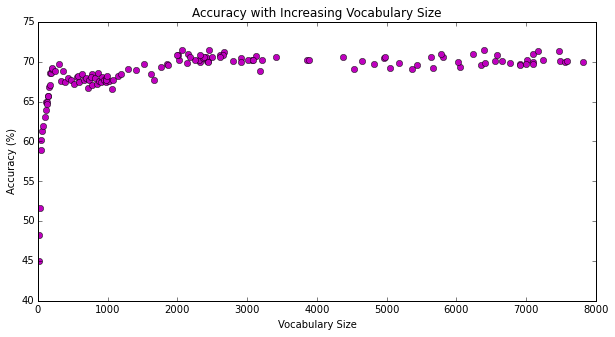

In [23]:
C = []
accuracy = []
vocab_size = []

def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    # --- Part 1 ---------------------------------------------------------
    # Compare number of non-zero weights between L2 and L1 penalties
    
    vectorizer = CountVectorizer()
    train_ftvec = vectorizer.fit_transform(train_data)
    dev_ftvec = vectorizer.transform(dev_data)

    print "Number of Non-Zero Weights"
    
    # Fit Log Reg with l1 penalty
    lr = LogisticRegression(penalty='l1')
    lr.fit(train_ftvec, train_labels)
    # Calculate number of features with at least one non-zero weight
    non_zero = np.any(lr.coef_ != 0, axis=0)
    print "L1: %d" % sum(non_zero)
    
    # Fit Log Reg with l2 penalty
    lr = LogisticRegression(penalty='l2')
    lr.fit(train_ftvec, train_labels)
    # Calculate number of features with at least one non-zero weight
    non_zero = np.any(lr.coef_ != 0, axis=0)
    print "L2: %d" % sum(non_zero)

    # --- Part 2 ---------------------------------------------------------
    # Plot accuracy vs vocabulary size

    params = np.hstack((np.arange(0.005,0.1,0.005), np.arange(0.1,1,0.025), np.arange(1,10,0.25), np.arange(10,102,2)))

    for i in params:
        # Fit Log Reg with L1 and corresponding C value
        lr_l1 = LogisticRegression(penalty='l1', tol=.01, C = i)
        lr_l1.fit(train_ftvec, train_labels)

        # Get index of features with at least one non-zero weight
        non_zero = np.any(lr_l1.coef_ != 0, axis=0)

        # Reduce vocabulary by keeping only features with non-zero weights
        small_vocab = np.array(vectorizer.get_feature_names())[non_zero]
        vocab_size.append(sum(non_zero))

        # Re-Vectorize training and dev data using reduced vocabulary
        vct_vocab = CountVectorizer(vocabulary = small_vocab)
        train_vocab_vct = vct_vocab.transform(train_data)
        dev_vocab_vct = vct_vocab.transform(dev_data)

        # Re-fit Log Reg model with l2 penalty
        lr_l2 = LogisticRegression(penalty='l2')
        lr_l2.fit(train_vocab_vct, train_labels)

        # Save model accuracy
        accuracy.append(lr_l2.score(dev_vocab_vct, dev_labels))
        C.append(i)
        
    # Plot 
    plt.figure(figsize=(10, 5))
    plt.plot(vocab_size, np.array(accuracy)*100, 'mo')
    plt.title("Accuracy with Increasing Vocabulary Size")
    plt.xlabel("Vocabulary Size")
    plt.ylabel("Accuracy (%)")
    plt.show()

P6()

**ANSWER**

> The vocabulary size with L2 is almost 26 times larger than the size with L1. This shows that L1 regularization results in a more sparse feature set than L2.

> L1 penalizes the absolute value of the weights so gains are linear. Decreasing a weight from 3.2 to 3 provides a gain of 0.2 which is equal to the gain provided by decreasing a weight from 0.2 to 0.
However, L2 penalizes the square weights so gains have diminishing returns. Decreasing a weight from 3.2 to 3 provides a gain of 1.24 which is much larger than the 0.04 gain of decreasing a weight from 0.2 to 0.

> This shows why L1 tends to force more weights to zero than L2.

---
**(7)** Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [11]:
def P7():
    v_tfid = TfidfVectorizer()
    train_v_tfid = v_tfid.fit_transform(train_data)
    dev_v_tfid = v_tfid.transform(dev_data)

    # Train logistic regression model
    lr = LogisticRegression(C=100)
    lr.fit(train_v_tfid, train_labels)

    # Get predicted probabilities
    pred_prob = lr.predict_proba(dev_v_tfid)
    print "Baseline Performance"
    print "   Accuracy:\t %0.3f" % lr.score(dev_v_tfid, dev_labels)
    print "   F1-score:\t %0.3f\n" % metrics.f1_score(dev_labels, lr.predict(dev_v_tfid), average='macro')
        
    # Calculate R ratio
    r_ratios = np.amax(pred_prob, axis=1) / pred_prob[np.arange(len(dev_labels)),dev_labels]
    
    print "3 Documents With Largest R-ratio"
    # Print 3 documents with largest R ratio
    for i in np.argsort(r_ratios)[-3:]:
        print "------------------------------------------"
        print "Actual Category:\t\t  %s " % categories[dev_labels[i]]
        np.set_printoptions(precision=3)
        print "Predicted Category:\t\t  %s " % categories[np.argmax(pred_prob[i,:])]
        print "R ratio:\t\t\t  %0.2f" %  r_ratios[i]
        print "Predicted Probababilities:\t ",  pred_prob[i,:]
        print "Message:\n"
        print dev_data[i], "\n"
    np.set_printoptions(precision=6)
    
### STUDENT END ###
P7()

Baseline Performance
   Accuracy:	 0.763
   F1-score:	 0.747

3 Documents With Largest R-ratio
------------------------------------------
Actual Category:		  alt.atheism 
Predicted Category:		  sci.space 
R ratio:			  287.18
Predicted Probababilities:	  [ 0.002  0.02   0.282  0.695]
Message:


The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


------------------------------------------
Actual Category:		  sci.space 
Predicted Category:		  talk.religion.misc 
R ratio:			  325.00
Predicted Probababilities:	  [ 0.003  0.98   0.014  0.003]
Message:

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

------------------------------------------
Actual Category:		  sci.space 
Predicted Category:		  talk.religion.misc 
R ratio:			  929.36
Predicted Probababilities:	  [ 0.002  0.994  0.003  0.001]
Message:

I am pleased

**ANSWER:**

**a. How is TfidfVectorizer different from the CountVectorizer?**

> CountVectorizer counts the number of times each term appears in a document. This is useful, but has two drawbacks. First, it does not take into consideration the length of each document, so longer documents, with inherently more words, will introduce bias. Second, it treats all terms with equal importance even though some terms are less informative than others because they appear in all the document.

> Tfidf tries to correct this by calculating term frequency and multiplying it by the inverse document frequency of the term. Term frequency corrects for the length of each document, while the inverse document frequency corrects for how informative each term is in the whole collection by making common terms less important and rare terms more important.


**b. What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.**

> The model is categorizing documents that contain *Book of Mormon* as talk.religion.misc because of the appearance of the word *Mormon*, although the book is not a relegious text. To correct this, documents can be preprocessed to group *Book of Mormon* under a single token like "bookofmormon".

---
**(8)** EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [123]:
def p8_preprocessor(s):
    s = better_preprocessor(s)
    s = re.sub(r'\bbook of mormon\b', 'bookofmormon', s)
    s = re.sub(r'\bbook of mormon_\b', 'bookofmormon', s)
    s = re.sub(r"\b_mormon's book_\b", 'bookofmormon', s)
    return s
        
def P8():
    
    # Baseline from P7() -------------------------------------------------------------------
    v_tfid = TfidfVectorizer()
    train_v_tfid = v_tfid.fit_transform(train_data)
    dev_v_tfid = v_tfid.transform(dev_data)

    # Train logistic regression model
    lr = LogisticRegression(C=100)
    lr.fit(train_v_tfid, train_labels)

    # Get predicted probabilities
    pred_prob = lr.predict_proba(dev_v_tfid)
    print "Baseline Performance"
    print "   Accuracy:\t %0.3f" % lr.score(dev_v_tfid, dev_labels)
    print "   F1-score:\t %0.3f\n" % metrics.f1_score(dev_labels, lr.predict(dev_v_tfid), average='macro')
    
    # P8 Processing -------------------------------------------------------------------    
    v_tfid = TfidfVectorizer(preprocessor=p8_preprocessor)
    train_v_tfid = v_tfid.fit_transform(train_data)
    dev_v_tfid = v_tfid.transform(dev_data)

    # Train logistic regression model
    lr = LogisticRegression(C=100)
    lr.fit(train_v_tfid, train_labels)

    # Get predicted probabilities
    pred_prob = lr.predict_proba(dev_v_tfid)
    print "Post-Processing Performance"
    print "   Accuracy:\t %0.3f" % lr.score(dev_v_tfid, dev_labels)
    print "   F1-score:\t %0.3f\n" % metrics.f1_score(dev_labels, lr.predict(dev_v_tfid), average='macro')
    
    
    # Calculate R ratio
    r_ratios = np.amax(pred_prob, axis=1) / pred_prob[np.arange(len(dev_labels)),dev_labels]
    
    print "\n3 Documents With Largest R-ratio"
    # Print 3 documents with largest R ratio
    for i in np.argsort(r_ratios)[-3:]:
        print "------------------------------------------"
        print "Actual Category:\t\t  %s " % categories[dev_labels[i]]
        np.set_printoptions(precision=3)
        print "Predicted Category:\t\t  %s " % categories[np.argmax(pred_prob[i,:])]
        print "R ratio:\t\t\t  %0.2f" %  r_ratios[i]
        print "Predicted Probababilities:\t ",  pred_prob[i,:]
        print "Message:\n"
        print dev_data[i], "\n"
    np.set_printoptions(precision=6)    
    
### STUDENT END ###
P8()

Baseline Performance
   Accuracy:	 0.763
   F1-score:	 0.747

Post-Processing Performance
   Accuracy:	 0.771
   F1-score:	 0.753


3 Documents With Largest R-ratio
------------------------------------------
Actual Category:		  alt.atheism 
Predicted Category:		  sci.space 
R ratio:			  294.35
Predicted Probababilities:	  [  3.369e-03   4.350e-04   4.482e-03   9.917e-01]
Message:

MC> Theory of Creationism: MY theistic view of the theory of
MC> creationism, (there  are many others) is stated in Genesis
MC> 1.  In the beginning God created the heavens and the earth.

And which order of Creation do you accept?	The story of creation is one of the
many places in the Bible where the Story contradicts itself.  The following is
an example...

GEN 1:25  And God made the beast of the earth after his kind, and cattle 
after  their kind, and every thing that creepeth upon the earth after his
kind: and God saw that it was good.
GEN 1:26  And God said, Let us make man in our image,  after  our like